   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
   label                                         final_news
0    1.0  house dem aide  didn t even see comey s letter...
1    0.0  flynn  hillary clinton  big woman campus   bre...
2    1.0  truth might get fired truth might get fired oc...
3    1.0     civilians killed single us airstrike identi...
4    1.0  iranian 

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.000000,0.000002,1.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Accuracy: 1.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


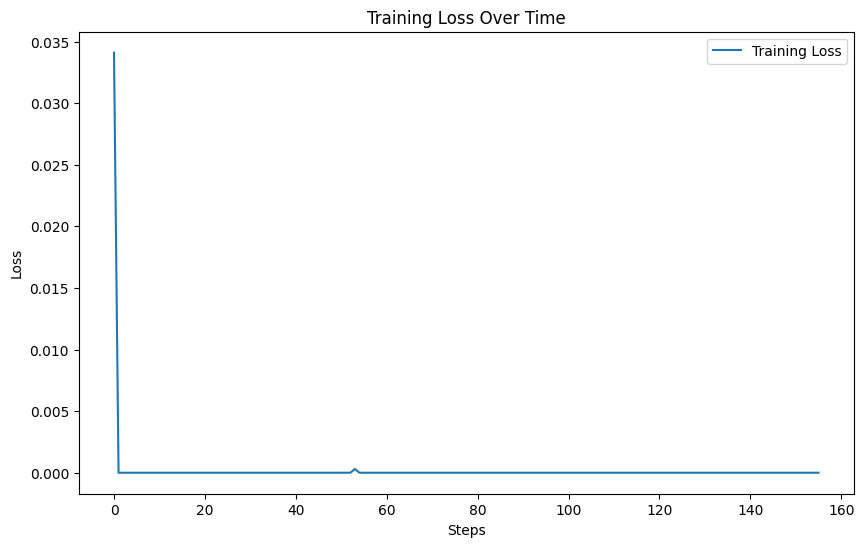

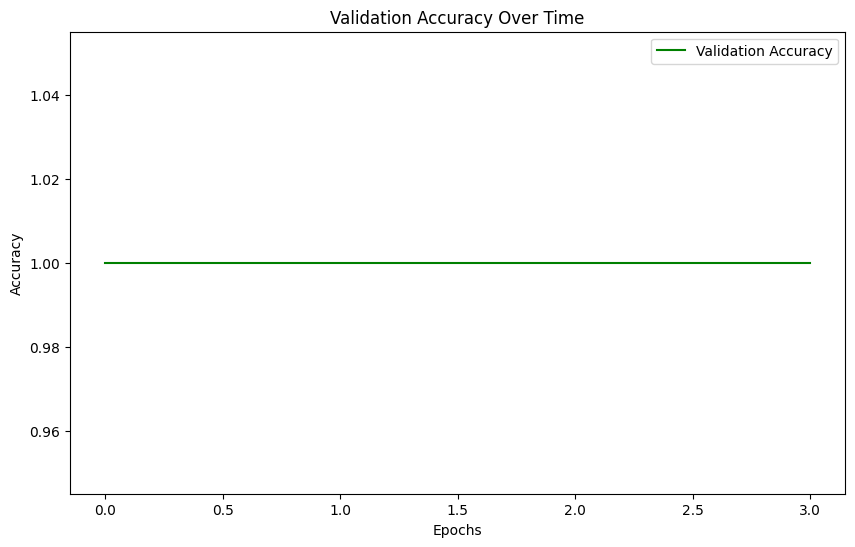

Total training time: 16 minutes and 57 seconds


In [1]:
# Install necessary libraries
!pip install transformers datasets scikit-learn matplotlib seaborn torch openpyxl --quiet

# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import AlbertTokenizer, AlbertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Measure total training time
start_time = time.time()

data = pd.read_csv('/content/final_dataset.csv')

# Inspect the data to understand its structure
print(data.head())

# Assuming the dataset has 'text' and 'label' columns
# Rename columns if necessary to match this assumption
# For example: data.columns = ['text', 'label']

# Check for missing values and handle them if necessary
data.dropna(inplace=True)

# Convert labels to binary (0 and 1) if not already
# Assuming labels are 'REAL' and 'FAKE', replace with 0 and 1
data['label'] = data['label'].apply(lambda x: 1 if x == 'FAKE' else 0)

# Prepare text and labels
X = data['final_news'].tolist()
y = data['label'].tolist()

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Load the tokenizer and tokenize the input texts
tokenizer = AlbertTokenizer.from_pretrained('albert-base-v2')

# Tokenize the datasets with suitable max length
train_encodings = tokenizer(X_train, padding=True, truncation=True, max_length=64, return_tensors='pt') # Reduced max_length to 64
val_encodings = tokenizer(X_val, padding=True, truncation=True, max_length=64, return_tensors='pt')

# Convert the labels to torch tensors
train_labels = torch.tensor(y_train)
val_labels = torch.tensor(y_val)

# Prepare the dataset as per Trainer class
class NewsDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = NewsDataset(train_encodings, train_labels)
val_dataset = NewsDataset(val_encodings, val_labels)


# Load the pre-trained ALBERT model for sequence classification
model = AlbertForSequenceClassification.from_pretrained('albert-base-v2', num_labels=2)

# Define the evaluation metric
def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    accuracy = accuracy_score(p.label_ids, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(p.label_ids, preds, average='binary')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }

# Training arguments with reduced logging and more efficient settings
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,   # Reduced batch size for memory efficiency
    per_device_eval_batch_size=8,
    num_train_epochs=3,              # 3 epochs
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,                # Reduced logging frequency
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

# Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

# Train the model with early stopping enabled
trainer.train()

# Evaluate the model
eval_result = trainer.evaluate()

# Print evaluation metrics
print(f"Validation Accuracy: {eval_result['eval_accuracy']}")
print(f"Precision: {eval_result['eval_precision']}")
print(f"Recall: {eval_result['eval_recall']}")
print(f"F1 Score: {eval_result['eval_f1']}")

# Plot training loss and evaluation accuracy
train_loss = trainer.state.log_history
train_loss_values = [entry['loss'] for entry in train_loss if 'loss' in entry]
eval_accuracy_values = [entry['eval_accuracy'] for entry in train_loss if 'eval_accuracy' in entry]

# Plotting training loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss_values, label="Training Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training Loss Over Time")
plt.legend()
plt.show()

# Plotting validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(eval_accuracy_values, label="Validation Accuracy", color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy Over Time")
plt.legend()
plt.show()

# Save the model
model.save_pretrained('./saved_model_albert')
tokenizer.save_pretrained('./saved_model_albert')

# Measure and print total training time
end_time = time.time()
total_time = end_time - start_time
print(f"Total training time: {total_time // 60:.0f} minutes and {total_time % 60:.0f} seconds")


In [10]:
# prompt: give the user input of a news article for the above model and preidct whether true or fake

from transformers import pipeline

# Load the saved model and tokenizer
model_path = './saved_model_albert'
classifier = pipeline("text-classification", model=model_path, tokenizer=model_path)

# Get user input for a news article
news_article = input("Enter the news article: ")

# Make the prediction (add truncation=True)
prediction = classifier(news_article, truncation=True)[0]

# Print the prediction result
if prediction['label'] == 'LABEL_0':
  print("The news article is predicted to be FAKE.")
elif prediction['label'] == 'LABEL_1':
  print("The news article is predicted to be REAL.")
else:
  print("Invalid prediction label.")
print(f"Confidence: {prediction['score']}")

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Enter the news article: un plans implant everyone biometric id  drill sounds like something philip k  dick novel  replicants all  united nations planning humans imprinted biometric identification cards   via alternativenews you re sure means you  would basically sci fi meets       world government would know go  do  you re with  times  anywhere  every day every night  means restrictions less freedom  united nations wants everyone biometric identification tag       part global goals agenda   united nations already working hard toward implementation goal   particularly among refugee populations  un partnered accenture implement biometric identification system reports information  back central database geneva     new biometric identification cards refugees  according different findbiometrics report  authorities hope technology enable achieve un s goal kind identification hands every man  woman child planet year    o    following comes official website world bank  providing legal identity 